### The battle of neighborhood

#### We will download new york cuisines borough cuisine data

In [9]:
import numpy as np 
import pandas as pd
from PIL import Image

import requests

#%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

from bs4 import BeautifulSoup
import csv

from wordcloud import WordCloud, STOPWORDS

print ('All relevent libraries are installed')

All relevent libraries are installed


In [97]:
#get data from wikipedia link https://en.wikipedia.org/wiki/Cuisine_of_New_York_City
url= requests.get('https://en.wikipedia.org/wiki/Cuisine_of_New_York_City').text
soup=BeautifulSoup(url,'lxml')

headers=['Borough','Neighborhood','Cuisine']

elements=soup.find_all('div',{'class':'div-col'})
borough = soup.find_all('span',{'class':'mw-headline'})

#print(elements[7].find_all('li'))
#row = [borough[12].text]
#print(row)
rows=[]

for i in range(4,8):
    for lists in elements[i].find_all('li'):
        row = [borough[i+4].text]
        row.append(lists.find('a').text)
        row.append(lists.text)
        rows.append(row)
        
for lists in elements[7].find_all('li'):
        row = [borough[12].text]
        row.append(lists.find('a').text)
        row.append(lists.text)
        rows.append(row)
        

with open('Ny_cuisines.csv','w') as f:
    writer = csv.writer(f)
    writer.writerow(headers)
    writer.writerows(row for row in rows if row)

In [98]:
df=pd.read_csv('Ny_cuisines.csv')
df

,Borough,Neighborhood,Cuisine
0,The Bronx,Bedford Park,"Bedford Park�Mexican, Puerto Rican, Dominican,..."
1,The Bronx,Belmont,"Belmont�Italian, Albanian (also known as ""Arth..."
2,The Bronx,City Island,"City Island�Italian, seafood"
3,The Bronx,Morris Park,"Morris Park�Italian, Albanian"
4,The Bronx,Norwood,"Norwood�Filipino (formerly Irish, less so today)"
...,...,...,...
63,Manhattan,Lower East Side,"Lower East Side�Puerto Rican, Jewish, Italian,..."
64,Manhattan,Murray Hill,"Murray Hill�Indian, Pakistani and Bangladeshi"
65,Manhattan,"Upper West Side, Manhattan","Upper West Side, Manhattan�Jewish, Chinese-Latino"
66,Manhattan,Washington Heights,"Washington Heights�Dominican, Puerto Rican, Me..."


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Borough       68 non-null     object
 1   Neighborhood  68 non-null     object
 2   Cuisine       68 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


### lets use this data for further analysis

In [115]:
borough_list = df.Borough.unique()
borough_list

array(['The Bronx', 'Queens', 'Brooklyn', 'Staten Island', 'Manhattan'],
      dtype=object)

In [101]:
df['Borough'].value_counts().to_frame()

,Borough
Brooklyn,19
Queens,14
Staten Island,13
Manhattan,13
The Bronx,9


In [104]:
cuisines = df[df.Borough == 'Manhattan']['Cuisine']
cuisines

55                     Chinatown�Chinese and Vietnamese
56    East Harlem�Puerto Rican, Mexican, Dominican, ...
57    East Village�Japanese, Korean, Indian and Ukra...
58         Greenwich Village�Italian and Middle Eastern
59    Harlem�Italian, African-American, Latin Americ...
60                                     Koreatown�Korean
61                                    Nolita�Australian
62                                 Little Italy�Italian
63    Lower East Side�Puerto Rican, Jewish, Italian,...
64        Murray Hill�Indian, Pakistani and Bangladeshi
65    Upper West Side, Manhattan�Jewish, Chinese-Latino
66    Washington Heights�Dominican, Puerto Rican, Me...
67             Upper East Side�German, Czech, Hungarian
Name: Cuisine, dtype: object

### World cloud of New york city cuisines

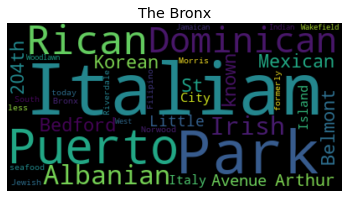

<Figure size 2160x3240 with 0 Axes>

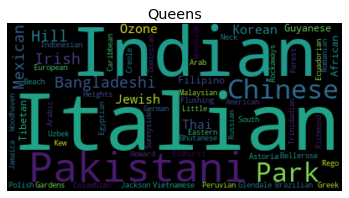

<Figure size 2160x3240 with 0 Axes>

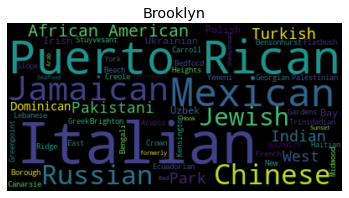

<Figure size 2160x3240 with 0 Axes>

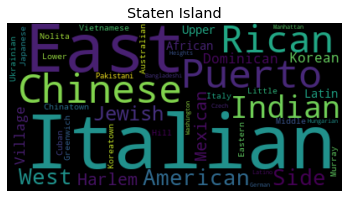

<Figure size 2160x3240 with 0 Axes>

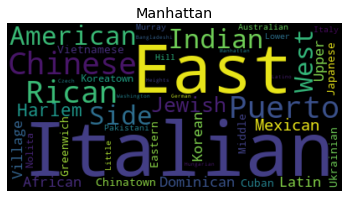

<Figure size 2160x3240 with 0 Axes>

In [116]:
for b in borough_list:
    data=df.copy()
    cuisines=data[data.Borough == b]['Cuisine']

    wc=WordCloud().generate(' '.join(cuisines))
    plt.imshow(wc,interpolation='bilinear')
    plt.axis("off")
    plt.title(b)
    fig = plt.figure()
    fig.set_figwidth(30)
    fig.set_figheight(45)
    plt.show()

### Most famous cuisines in different borough

#### Most Preferred Food in The Bronx is -

Italian >>
Puerto Rican >>
Albanian >> 
Dominican >>

#### Most Preferred Food in Queens is -

Indian >>
Irish >>
Pakistani >>
Mexican >>

#### Most Preferred Food in Brooklyn is -

Italian >>
Purto Rican >>
Mexican 

#### Most Preferred Food in Statan Island is -

Italian >>
Chinese >>
Indian >>
Puerto Rikan

#### Most Preferred Food in Manhattan is -

Italian >>
American >>
Puerto Rikan >>
Indian

### Most Famous food in America

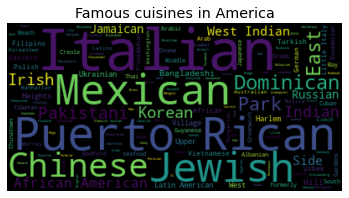

<Figure size 2160x3240 with 0 Axes>

In [123]:
cuisines=df['Cuisine']

wc=WordCloud().generate(' '.join(cuisines))
plt.imshow(wc,interpolation='bilinear')
plt.axis("off")
plt.title('Famous cuisines in New York City')
fig = plt.figure()
fig.set_figwidth(30)
fig.set_figheight(45)
plt.show()

## Most Preferred Food in New York City -

Italian >>
Purto Rican >>
Mexican >> 
Jewish >> 
Indian >>
Pakistani >>
Dominican 